In [3]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import re
#import cx_Oracle
#import sqlite3

In [4]:
file1=open('./commit_metrics.txt','r')
file1

FileNotFoundError: [Errno 2] No such file or directory: './commit_metrics.txt'

In [5]:
with open("commit_metrics.txt", 'r') as f:
    wordlist = f.read().splitlines()
wordlist

FileNotFoundError: [Errno 2] No such file or directory: 'commit_metrics.txt'

In [38]:
commitagr=[]
string=""
for i in wordlist:
    if(i=='-----------'):
        commitagr.append(string)
        string=""
    else:
        string=string+i+"\n"

In [39]:
commitagr

["\nKAFKA-15450 Don't allow ZK migration with JBOD (#14367)\n    \nReviewers: Ron Dagostino <rndgstn@gmail.com>\n2 changed files\n13 additions\n0 deletions\nDATE:Sep 12, 2023\n",
 '\nKAFKA-15439: Transactions test with tiered storage (#14347)\n    \nThis test extends the existing TransactionsTest. It configures the broker and topic with tiered storage and expects at-least one log segment to be uploaded to the remote storage.\n\nReviewers: Luke Chen <showuon@gmail.com>, Satish Duggana <satishd@apache.org>,  Divij Vaidya <diviv@amazon.com>\n14 changed files\n377 additions\n204 deletions\nDATE:Sep 14, 2023\n',
 '\nKAFKA-15418: update Kafka design docs with decompression information (#…\n\n…14322)\n\nReviewers: Divij Vaidya <diviv@amazon.com>, Matthias J. Sax <mjsax@apache.org>\n\n---------\n\nCo-authored-by: Cerchie <lcerchie@confluent.io>\n1 changed file\n3 additions\n2 deletions\nDATE:Sep 8, 2023\n',
 '\nKAFKA-15352: Update log-start-offset before initiating deletion of re…\n    \n…mote

In [40]:
id=[]
additions=[]
changes=[]
deletions=[]
date=[]
fix=[]
for i in commitagr:
    match=re.search(r'(#[0-9]{5})',i)
    if(match!=None):
        id.append(i[match.start()+1:i.find(')',match.start(),len(i))])
    else:
        continue
    match=re.search(r'\n.* addition[s]?\n',i)
    additions.append(i[match.start()+1:i.find(' ',match.start(),len(i))])
    match=re.search(r'\n.* deletion[s]?\n',i)
    deletions.append(i[match.start()+1:i.find(' ',match.start(),len(i))])
    match=re.search(r'\n.* changed file[s]?\n',i)
    changes.append(i[match.start()+1:i.find(' ',match.start(),len(i))])
    match=re.search(r'\nDATE:.*\n',i)
    date.append(i[match.start()+6:len(i)-1])
    if('fix' in i or 'bug' in i or 'bugs' in i or 'fixed' in i):
        fix.append(1)
    else:
        fix.append(0)

In [41]:
"""
fix=[]
for i in commitaggr:
    if('fix' in i or 'bug' in i or 'bugs' in i):
        fix.append(1)
    else:
        fix.append(0)
"""

"\nfix=[]\nfor i in commitaggr:\n    if('fix' in i or 'bug' in i or 'bugs' in i):\n        fix.append(1)\n    else:\n        fix.append(0)\n"

In [42]:
len(id)

1693

In [43]:
final_list={'id':id,"additions":additions,"changes":changes,"deletions":deletions,"fix":fix,"date":date}
data=pd.DataFrame(final_list)

In [44]:
data

,id,additions,changes,deletions,fix,date
0,14367,13,2,0,0,"Sep 12, 2023"
1,14347,377,14,204,0,"Sep 14, 2023"
2,14349,251,2,40,0,"Sep 12, 2023"
3,14305,153,10,51,0,"Sep 7, 2023"
4,14341,0,1,17,0,"Sep 7, 2023"
...,...,...,...,...,...,...
1688,11913,11,5,36,0,"Mar 21, 2022"
1689,11733,"1,619",65,707,0,"Mar 18, 2022"
1690,11924,2,1,2,0,"Mar 22, 2022"
1691,11471,26,3,45,0,"Mar 17, 2022"


In [45]:
bada=[]
badd=[]
badc=[]
ind=0
for (i,j,k) in zip(data["additions"],data['deletions'],data['changes']):
    if(i.isnumeric()==False):
        data.drop(ind,axis=0,inplace=True)
    elif(j.isnumeric()==False):
        data.drop(ind,axis=0,inplace=True)
    elif(k.isnumeric()==False):
        data.drop(ind,axis=0,inplace=True)
    ind=ind+1

In [46]:
len(data)

1622

In [47]:
data["additions"]=data["additions"].astype(int)
data["deletions"]=data["deletions"].astype(int)
data["changes"]=data["changes"].astype(int)

In [48]:
data.describe()

,additions,changes,deletions,fix
count,1622.000000,1622.000000,1622.000000,1622.000000
mean,132.636252,5.451295,52.228113,0.173243
std,205.790289,8.796684,105.979144,0.378574
min,0.000000,1.000000,0.000000,0.000000
25%,6.000000,1.000000,2.000000,0.000000
50%,41.000000,2.000000,10.000000,0.000000
75%,157.750000,6.000000,48.750000,0.000000
max,990.000000,159.000000,890.000000,1.000000


In [49]:
def shannon_entropy(data):
    probabilities = data / data.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

In [50]:
data['SE_additions']=shannon_entropy(data['additions'])
data['SE_deletions']=shannon_entropy(data['deletions'])
data['SE_changes']=shannon_entropy(data['changes'])

<Axes: xlabel='fix', ylabel='count'>

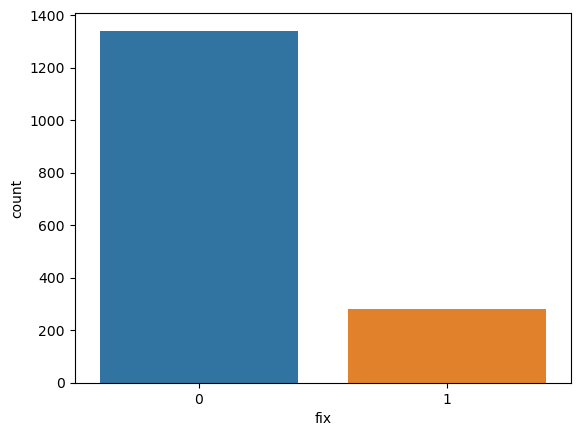

In [51]:
sns.countplot(x=data["fix"])

In [52]:
netchange=[(i-j) for (i,j) in zip(data['deletions'],data['additions'])]
avgchange=[(i+j)/2 for (i,j,k) in zip(data['deletions'],data['additions'],data['changes'])] 
data["netchange"]=netchange
data["netchange"]=data["netchange"].abs()
data['avgchange']=avgchange

In [53]:
data

,id,additions,changes,deletions,fix,date,SE_additions,SE_deletions,SE_changes,netchange,avgchange
0,14367,13,2,0,0,"Sep 12, 2023",9.368499,8.979308,9.717889,13,6.5
1,14347,377,14,204,0,"Sep 14, 2023",9.368499,8.979308,9.717889,173,290.5
2,14349,251,2,40,0,"Sep 12, 2023",9.368499,8.979308,9.717889,211,145.5
3,14305,153,10,51,0,"Sep 7, 2023",9.368499,8.979308,9.717889,102,102.0
4,14341,0,1,17,0,"Sep 7, 2023",9.368499,8.979308,9.717889,17,8.5
...,...,...,...,...,...,...,...,...,...,...,...
1687,11475,0,2,4,0,"Mar 15, 2022",9.368499,8.979308,9.717889,4,2.0
1688,11913,11,5,36,0,"Mar 21, 2022",9.368499,8.979308,9.717889,25,23.5
1690,11924,2,1,2,0,"Mar 22, 2022",9.368499,8.979308,9.717889,0,2.0
1691,11471,26,3,45,0,"Mar 17, 2022",9.368499,8.979308,9.717889,19,35.5


In [54]:
data['date']=pd.to_datetime(data["date"])

In [55]:
data.sort_values(['date'],inplace=True)

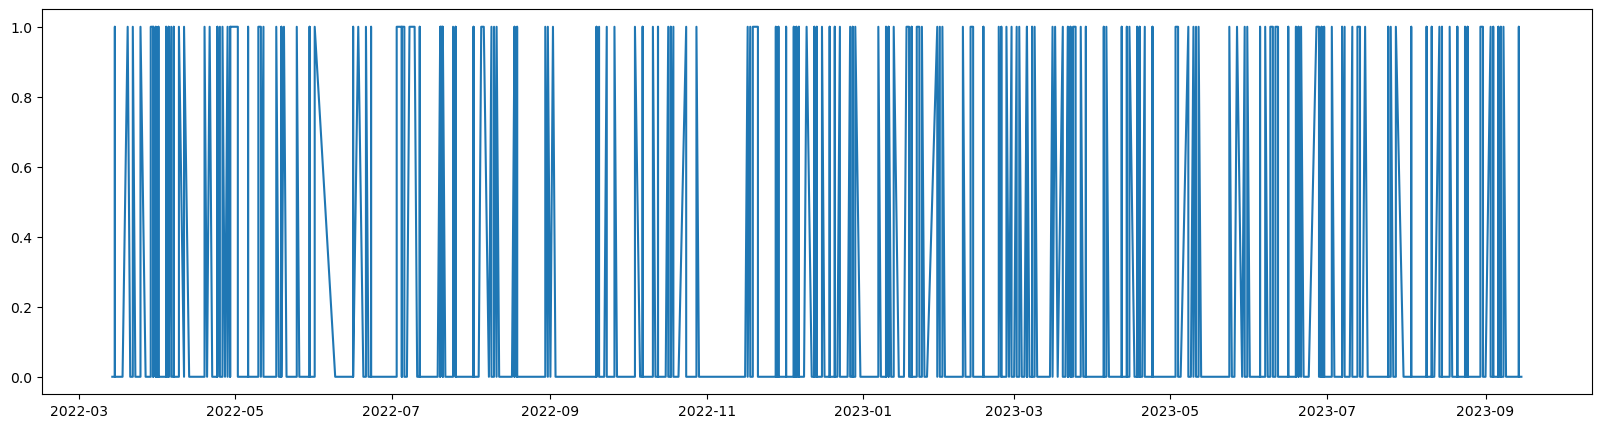

In [56]:
fig,ax=plt.subplots(figsize=(20,5))
ax=plt.plot(data['date'],data['fix'])

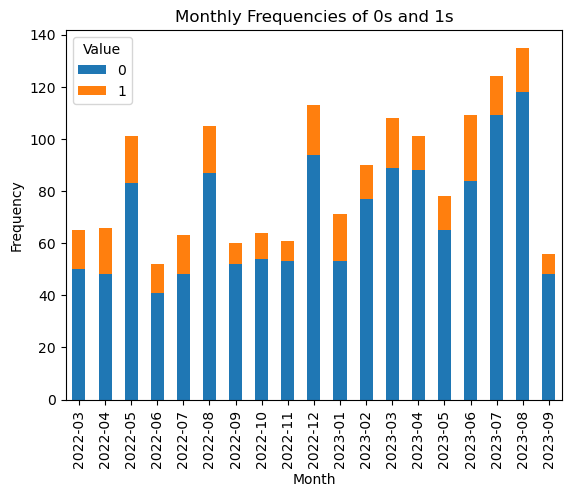

In [57]:
monthly_counts = data.groupby(data['date'].dt.to_period('M'))['fix'].value_counts().unstack()
monthly_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Frequencies of 0s and 1s')
plt.legend(title='Value')
plt.show()

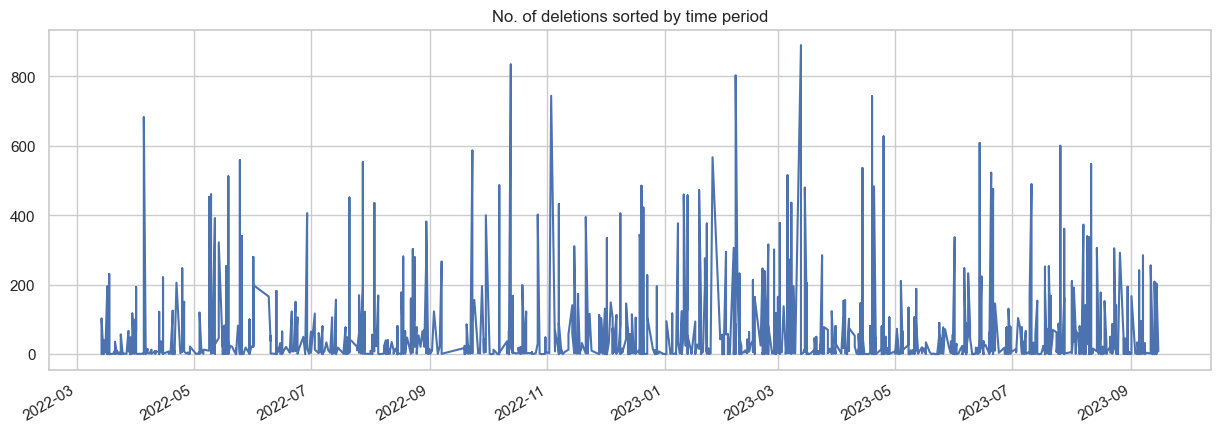

In [87]:
data=data.set_index(data['date'])
plt.figure(figsize=(15,5))
plt.plot(data['deletions'])
plt.title('No. of deletions sorted by time period')
plt.gcf().autofmt_xdate()
plt.show()

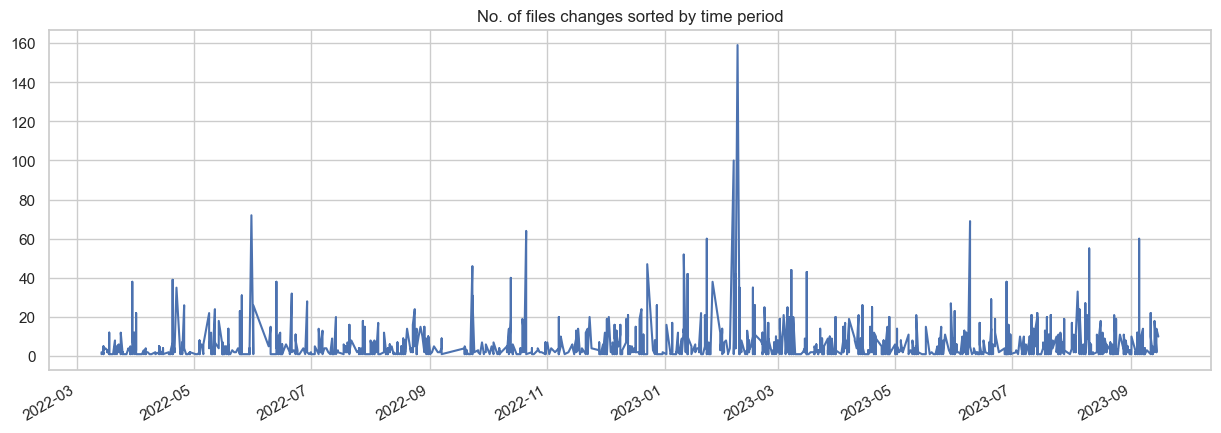

In [86]:
plt.figure(figsize=(15,5))
plt.plot(data['changes'])
plt.gcf().autofmt_xdate()
plt.title('No. of files changes sorted by time period')
plt.show()

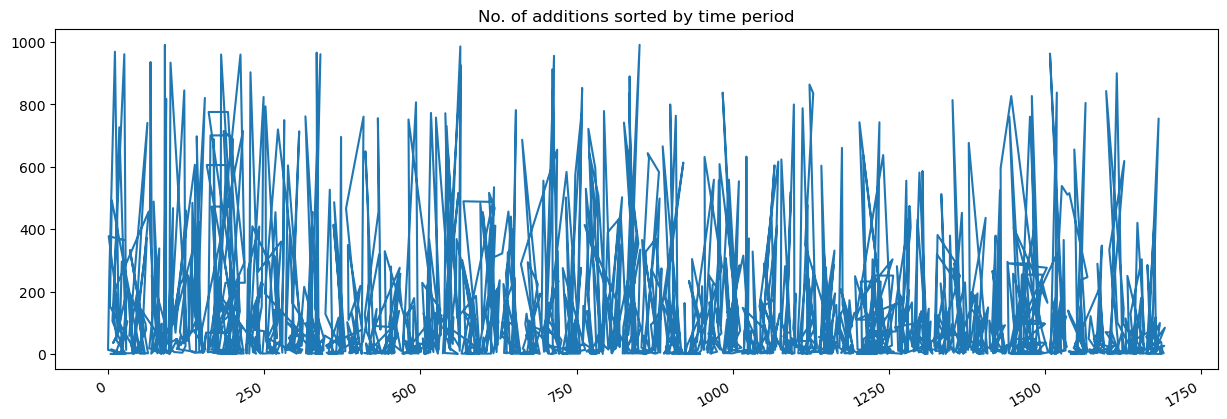

In [61]:
plt.figure(figsize=(15,5))
plt.plot(data['additions'])
plt.gcf().autofmt_xdate()
plt.title('No. of additions sorted by time period')
plt.show()

In [94]:
data

,id,additions,changes,deletions,fix,date,netchange
date,,,,,,,
2022-03-14,11877,38,2,0,0,2022-03-14,38
2022-03-14,11887,55,1,103,0,2022-03-14,48
2022-03-15,11855,84,2,0,0,2022-03-15,84
2022-03-15,11902,5,1,1,1,2022-03-15,4
2022-03-15,11891\n\n,117,3,1,0,2022-03-15,116
...,...,...,...,...,...,...,...
2023-09-13,14346,960,18,209,0,2023-09-13,751
2023-09-14,14382,105,3,0,0,2023-09-14,105
2023-09-14,14287,20,2,1,1,2023-09-14,19


<Axes: >

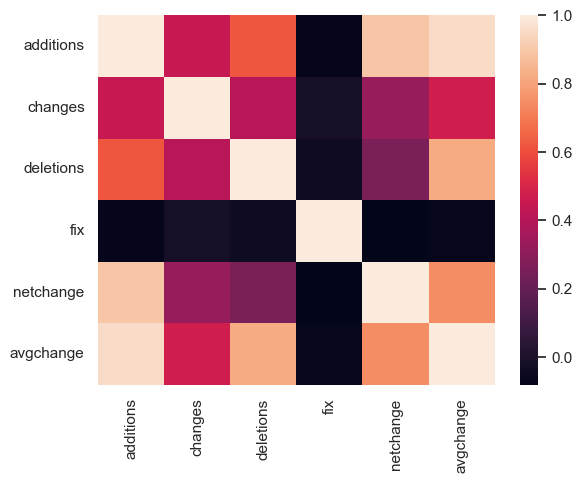

In [153]:
corr=data.drop(['id','date'],axis=1).corr()
sns.heatmap(corr)

In [148]:
data.to_csv('data_kafka.csv')